In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [23]:
# Parametry modelu
beta = 1
gamma = 1/7
h = 0.2
t_start = 0
t_end = 14

# Liczba kroków
num_steps = int((t_end-t_start) / h) + 1


C:\Users\marci\AppData\Local\Temp\ipykernel_27336\202947404.py:15: RuntimeWarning: overflow encountered in scalar multiply
  S_explicit[k+1] = S_explicit[k] - h * beta * I_explicit[k] * S_explicit[k]
C:\Users\marci\AppData\Local\Temp\ipykernel_27336\202947404.py:16: RuntimeWarning: overflow encountered in scalar multiply
  I_explicit[k+1] = I_explicit[k] + h * (beta * I_explicit[k] * S_explicit[k] - gamma * I_explicit[k])
C:\Users\marci\AppData\Local\Temp\ipykernel_27336\202947404.py:16: RuntimeWarning: invalid value encountered in scalar subtract
  I_explicit[k+1] = I_explicit[k] + h * (beta * I_explicit[k] * S_explicit[k] - gamma * I_explicit[k])


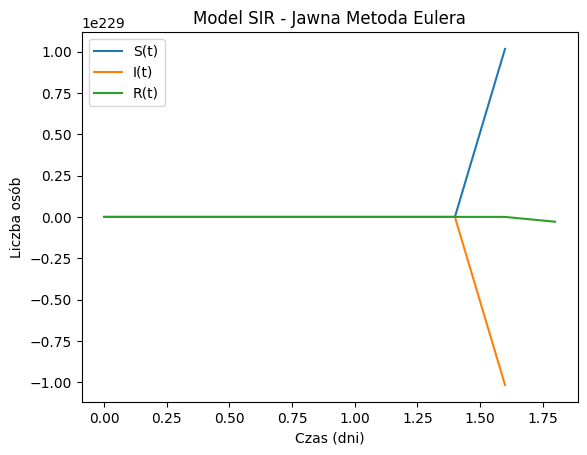

In [24]:
# Inicjalizacja tablic
S_explicit = np.zeros(num_steps)
I_explicit = np.zeros(num_steps)
R_explicit = np.zeros(num_steps)
t_explicit = np.zeros(num_steps)

# Warunki początkowe
S_explicit[0] = 762
I_explicit[0] = 1
R_explicit[0] = 0


# Jawna metoda Eulera
for k in range(num_steps - 1):
    S_explicit[k+1] = S_explicit[k] - h * beta * I_explicit[k] * S_explicit[k]
    I_explicit[k+1] = I_explicit[k] + h * (beta * I_explicit[k] * S_explicit[k] - gamma * I_explicit[k])
    R_explicit[k+1] = R_explicit[k] + h * gamma * I_explicit[k]
    t_explicit[k+1] = t_explicit[k] + h

# Rysowanie wyników
plt.plot(t_explicit, S_explicit, label='S(t)')
plt.plot(t_explicit, I_explicit, label='I(t)')
plt.plot(t_explicit, R_explicit, label='R(t)')
plt.xlabel('Czas (dni)')
plt.ylabel('Liczba osób')
plt.legend()
plt.title('Model SIR - Jawna Metoda Eulera')
plt.show()

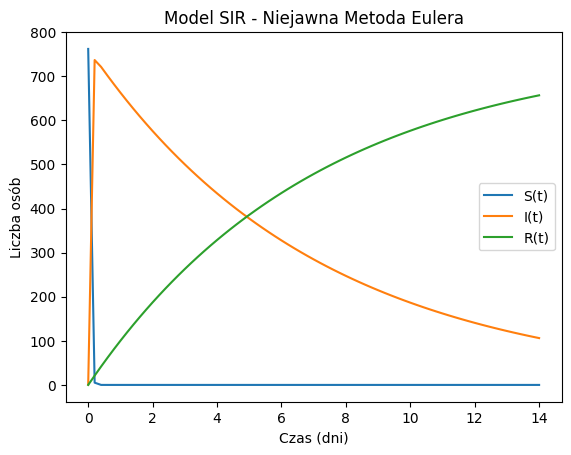

In [25]:
# Metoda niejawna Eulera

# Stworzenie tablic
S_non_explicit = np.zeros(num_steps)
I_non_explicit = np.zeros(num_steps)
R_non_explicit = np.zeros(num_steps)
t_non_explicit = np.zeros(num_steps)

# Warunki początkowe
S_non_explicit[0] = 762
I_non_explicit[0] = 1
R_non_explicit[0] = 0

# Funkcja iteracyjna dla metody niejawnej
def iterate_implicit_euler(S_prev, I_prev, R_prev):
    S_next = S_prev
    I_next = I_prev
    R_next = R_prev
    for _ in range(10):  # Iteracje Picarda
        S_next = S_prev / (1 + h * beta * I_next)
        I_next = (I_prev + h * beta * S_next * I_next) / (1 + h * gamma)
        R_next = R_prev + h * gamma * I_next
    return S_next, I_next, R_next

for k in range(num_steps - 1):
    S_non_explicit[k+1], I_non_explicit[k+1], R_non_explicit[k+1] = iterate_implicit_euler(S_non_explicit[k], I_non_explicit[k], R_non_explicit[k])
    t_non_explicit[k+1] = t_non_explicit[k] + h

# Rysowanie wyników
plt.plot(t_non_explicit, S_non_explicit, label='S(t)')
plt.plot(t_non_explicit, I_non_explicit, label='I(t)')
plt.plot(t_non_explicit, R_non_explicit, label='R(t)')
plt.xlabel('Czas (dni)')
plt.ylabel('Liczba osób')
plt.legend()
plt.title('Model SIR - Niejawna Metoda Eulera')
plt.show()

C:\Users\marci\AppData\Local\Temp\ipykernel_27336\3440997286.py:19: RuntimeWarning: overflow encountered in scalar multiply
  k1_S = -beta * S[k] * I[k]
C:\Users\marci\AppData\Local\Temp\ipykernel_27336\3440997286.py:20: RuntimeWarning: overflow encountered in scalar multiply
  k1_I = beta * S[k] * I[k] - gamma * I[k]
C:\Users\marci\AppData\Local\Temp\ipykernel_27336\3440997286.py:24: RuntimeWarning: invalid value encountered in scalar subtract
  k2_I = beta * (S[k] + 0.5 * h * k1_S) * (I[k] + 0.5 * h * k1_I) - gamma * (I[k] + 0.5 * h * k1_I)


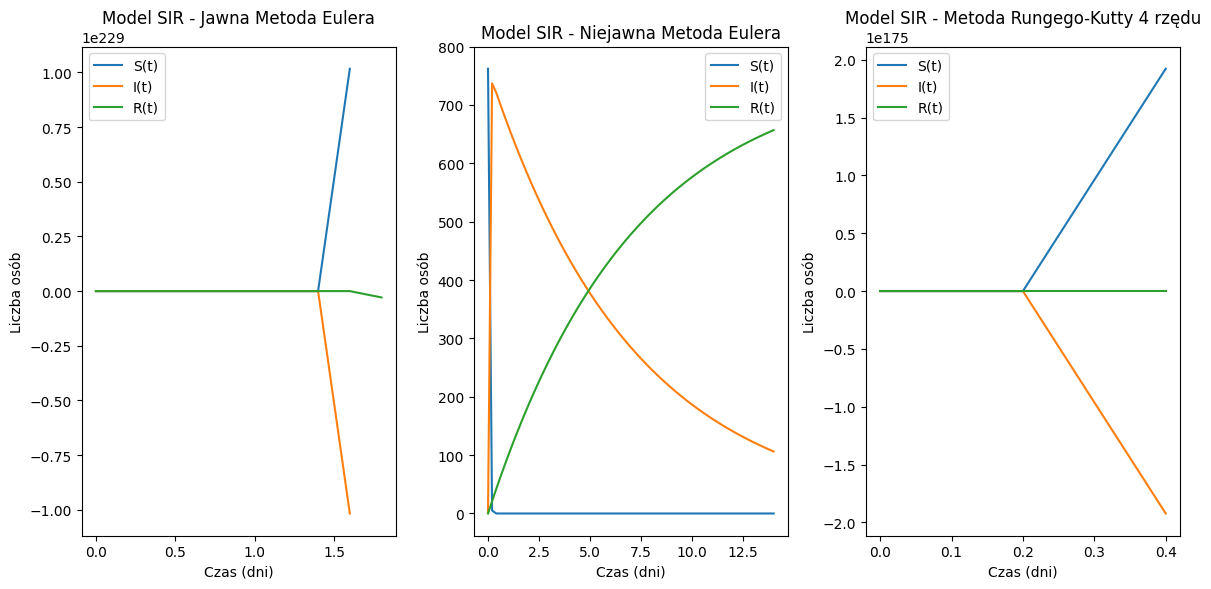

In [26]:
# Metoda Rungego-Kutty

# Stworzenie tablic
I_data = np.array([1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4])
days = np.arange(len(I_data))

# Funkcja dla metody RK4
def sir_rk4(beta, gamma, S0, I0, R0, t_end, h):
    num_steps = int(t_end / h) + 1
    S = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)
    t = np.zeros(num_steps)
    S[0], I[0], R[0] = S0, I0, R0

    for k in range(num_steps - 1):
        t[k+1] = t[k] + h

        k1_S = -beta * S[k] * I[k]
        k1_I = beta * S[k] * I[k] - gamma * I[k]
        k1_R = gamma * I[k]

        k2_S = -beta * (S[k] + 0.5 * h * k1_S) * (I[k] + 0.5 * h * k1_I)
        k2_I = beta * (S[k] + 0.5 * h * k1_S) * (I[k] + 0.5 * h * k1_I) - gamma * (I[k] + 0.5 * h * k1_I)
        k2_R = gamma * (I[k] + 0.5 * h * k1_I)

        k3_S = -beta * (S[k] + 0.5 * h * k2_S) * (I[k] + 0.5 * h * k2_I)
        k3_I = beta * (S[k] + 0.5 * h * k2_S) * (I[k] + 0.5 * h * k2_I) - gamma * (I[k] + 0.5 * h * k2_I)
        k3_R = gamma * (I[k] + 0.5 * h * k2_I)

        k4_S = -beta * (S[k] + h * k3_S) * (I[k] + h * k3_I)
        k4_I = beta * (S[k] + h * k3_S) * (I[k] + h * k3_I) - gamma * (I[k] + h * k3_I)
        k4_R = gamma * (I[k] + h * k3_I)

        S[k+1] = S[k] + (h / 6) * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
        I[k+1] = I[k] + (h / 6) * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
        R[k+1] = R[k] + (h / 6) * (k1_R + 2 * k2_R + 2 * k3_R + k4_R)

    return S, I, R, t

# Warunki początkowe
S0 = 762
I0 = 1
R0 = 0

# Obliczenia metodą RK4
S, I, R, t = sir_rk4(beta, gamma, S0, I0, R0, t_end, h)

# Rysowanie wyników
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(t_explicit, S_explicit, label='S(t)')
plt.plot(t_explicit, I_explicit, label='I(t)')
plt.plot(t_explicit, R_explicit, label='R(t)')
plt.xlabel('Czas (dni)')
plt.ylabel('Liczba osób')
plt.legend()
plt.title('Model SIR - Jawna Metoda Eulera')


plt.subplot(1, 3, 2)
plt.plot(t_non_explicit, S_non_explicit, label='S(t)')
plt.plot(t_non_explicit, I_non_explicit, label='I(t)')
plt.plot(t_non_explicit, R_non_explicit, label='R(t)')
plt.xlabel('Czas (dni)')
plt.ylabel('Liczba osób')
plt.legend()
plt.title('Model SIR - Niejawna Metoda Eulera')

plt.subplot(1, 3, 3)
plt.plot(t, S, label='S(t)')
plt.plot(t, I, label='I(t)')
plt.plot(t, R, label='R(t)')
plt.xlabel('Czas (dni)')
plt.ylabel('Liczba osób')
plt.legend()
plt.title('Model SIR - Metoda Rungego-Kutty 4 rzędu')


plt.tight_layout()
plt.show()

In [27]:
# Funkcja kosztu RSS
def cost_function_rss(params, S0, I0, R0, I_data, t_end, h):
    beta, gamma = params
    _, I, _, _ = sir_rk4(beta, gamma, S0, I0, R0, t_end, h)
    return np.sum((I_data - I[:len(I_data)])**2)

# Estymacja parametrów metodą Neldera-Meada
initial_params = [1, 1/7]
result = minimize(cost_function_rss, initial_params, args=(S0, I0, R0, I_data, t_end, h), method='Nelder-Mead')
beta_est, gamma_est = result.x

print(f'Estymowane wartości parametrów (RSS): beta = {beta_est}, gamma = {gamma_est}')


C:\Users\marci\AppData\Local\Temp\ipykernel_27336\3440997286.py:19: RuntimeWarning: overflow encountered in scalar multiply
  k1_S = -beta * S[k] * I[k]
C:\Users\marci\AppData\Local\Temp\ipykernel_27336\3440997286.py:20: RuntimeWarning: overflow encountered in scalar multiply
  k1_I = beta * S[k] * I[k] - gamma * I[k]
C:\Users\marci\AppData\Local\Temp\ipykernel_27336\3440997286.py:24: RuntimeWarning: invalid value encountered in scalar subtract
  k2_I = beta * (S[k] + 0.5 * h * k1_S) * (I[k] + 0.5 * h * k1_I) - gamma * (I[k] + 0.5 * h * k1_I)
C:\Users\marci\AppData\Local\Temp\ipykernel_27336\3476160936.py:5: RuntimeWarning: overflow encountered in square
  return np.sum((I_data - I[:len(I_data)])**2)


Estymowane wartości parametrów (RSS): beta = 1.0, gamma = 0.14285714285714285


In [28]:
# Funkcja kosztu log-likelihood
def cost_function_ll(params, S0, I0, R0, I_data, t_end, h):
    beta, gamma = params
    _, I, _, _ = sir_rk4(beta, gamma, S0, I0, R0, t_end, h)
    I = I[:len(I_data)]
    return -np.sum(I_data * np.log(I) - I)

# Estymacja parametrów metodą Neldera-Meada
result_ll = minimize(cost_function_ll, initial_params, args=(S0, I0, R0, I_data, t_end, h), method='Nelder-Mead')
beta_est_ll, gamma_est_ll = result_ll.x

print(f'Estymowane wartości parametrów (log-likelihood): beta = {beta_est_ll}, gamma = {gamma_est_ll}')

R0_rss = beta_est / gamma_est
R0_ll = beta_est_ll / gamma_est_ll

print(f'Współczynnik reprodukcji R0 (RSS): {R0_rss}')
print(f'Współczynnik reprodukcji R0 (log-likelihood): {R0_ll}')


C:\Users\marci\AppData\Local\Temp\ipykernel_27336\3440997286.py:19: RuntimeWarning: overflow encountered in scalar multiply
  k1_S = -beta * S[k] * I[k]
C:\Users\marci\AppData\Local\Temp\ipykernel_27336\3440997286.py:20: RuntimeWarning: overflow encountered in scalar multiply
  k1_I = beta * S[k] * I[k] - gamma * I[k]
C:\Users\marci\AppData\Local\Temp\ipykernel_27336\3440997286.py:24: RuntimeWarning: invalid value encountered in scalar subtract
  k2_I = beta * (S[k] + 0.5 * h * k1_S) * (I[k] + 0.5 * h * k1_I) - gamma * (I[k] + 0.5 * h * k1_I)
C:\Users\marci\AppData\Local\Temp\ipykernel_27336\1609455311.py:6: RuntimeWarning: invalid value encountered in log
  return -np.sum(I_data * np.log(I) - I)


Estymowane wartości parametrów (log-likelihood): beta = 1.0, gamma = 0.14285714285714285
Współczynnik reprodukcji R0 (RSS): 7.0
Współczynnik reprodukcji R0 (log-likelihood): 7.0
